<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

NOTE: All CSVs are in the same directory as this notebook

In [2]:
pwd

'/Users/yuesu/lectures/course-info/projects/project_2/project-two'

In [3]:
sat_scores=pd.read_csv('sat_scores.csv')

### 1.1 Make a pandas DataFrame object with pandas `.read_csv()` function

Take a look at the `.dtypes` attribute in the DataFrame. 

In [4]:
sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

### 1.2 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
sat_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [6]:
sat_dict={'state':'string','rate':'int','verbal':'int','math':'int','shape':sat_scores.shape}

In [7]:
sat_dict

{'math': 'int',
 'rate': 'int',
 'shape': (52, 4),
 'state': 'string',
 'verbal': 'int'}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

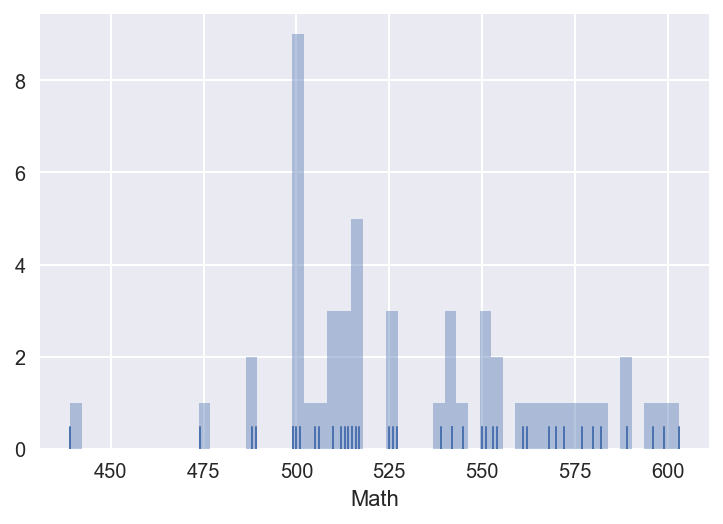

In [8]:
sns.distplot(sat_scores['Math'], kde=False,bins=52,hist=True,rug=True)

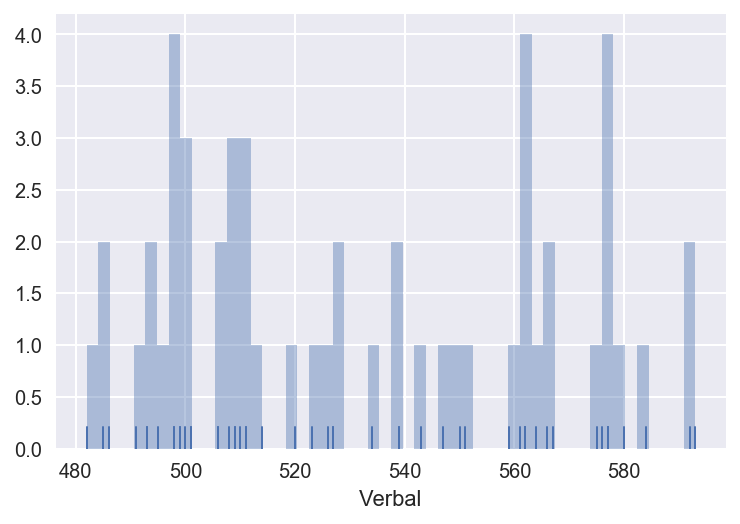

In [9]:
sns.distplot(sat_scores['Verbal'], kde=False,bins=52,hist=True,rug=True)

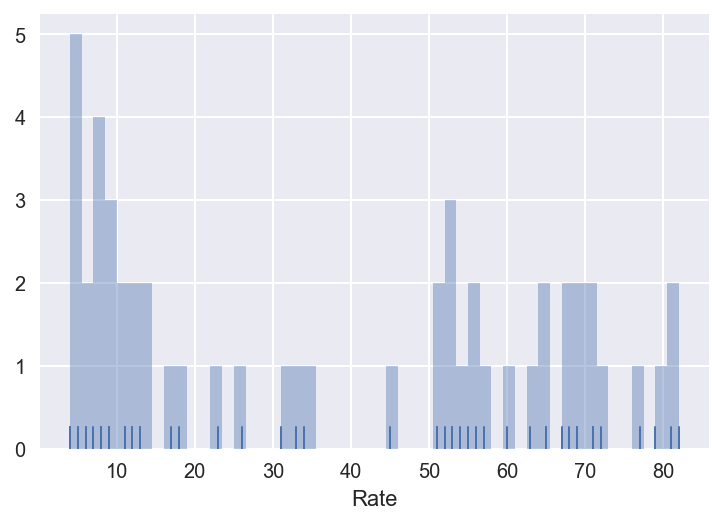

In [10]:
sns.distplot(sat_scores['Rate'], kde=False,bins=52,hist=True,rug=True)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

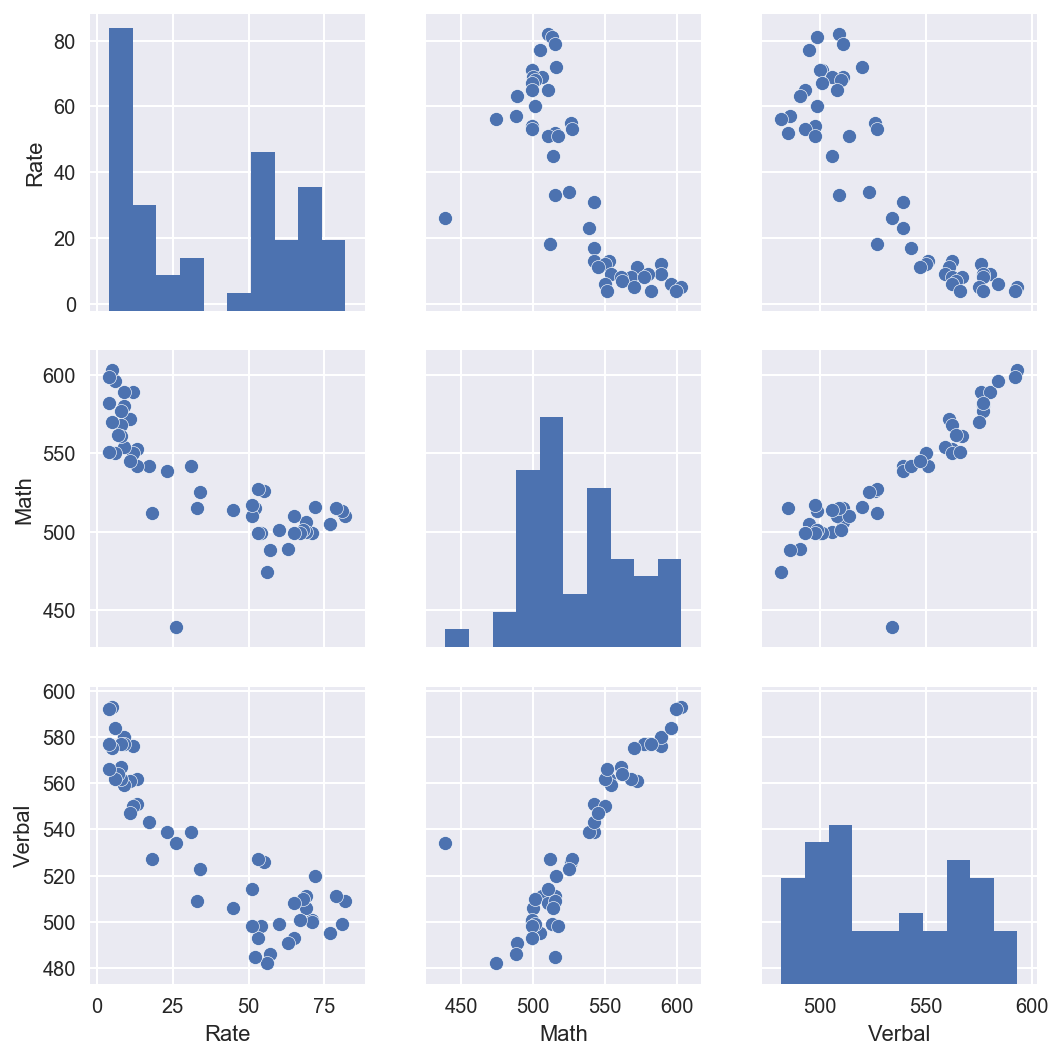

In [11]:
sns.pairplot(sat_scores,vars=['Rate','Math','Verbal'])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

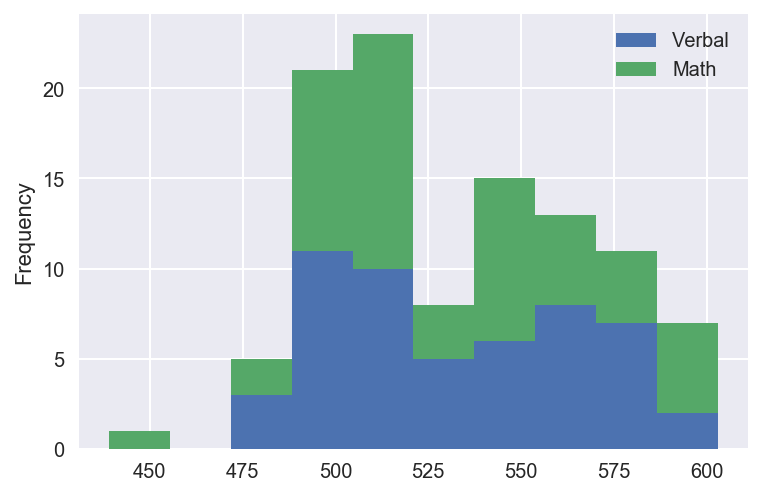

In [12]:
sat_scores[['Verbal','Math']].plot.hist(stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

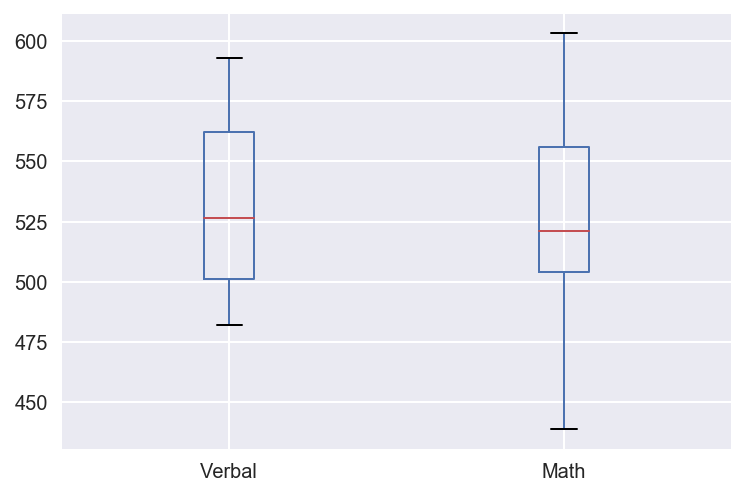

In [13]:
sat_scores[['Verbal','Math']].plot.box(stacked=True)

Here is my explanation!
Boxplots show outliers

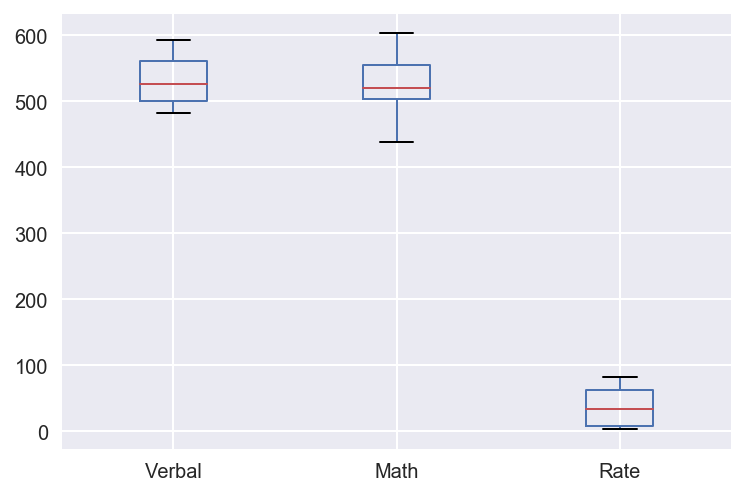

In [14]:
sat_scores[['Verbal','Math','Rate']].plot.box(stacked=True)

Rate has different scales with Math and Verbal.

In [15]:
##standardize math, rate and verbal

In [16]:
rate_mean=np.mean(sat_scores['Rate'])
rate_std=np.std(sat_scores['Rate'])
sat_scores['nor_rate']=(sat_scores['Rate']-rate_mean)/rate_std

In [17]:
math_mean=np.mean(sat_scores['Math'])
math_std=np.std(sat_scores['Math'])
sat_scores['nor_math']=(sat_scores['Math']-math_mean)/math_std

In [18]:
verbal_mean=np.mean(sat_scores['Verbal'])
verbal_std=np.std(sat_scores['Verbal'])
sat_scores['nor_verbal']=(sat_scores['Verbal']-verbal_mean)/verbal_std

In [19]:
sat_scores.head()

,State,Rate,Verbal,Math,nor_rate,nor_math,nor_verbal
0,CT,82,509,510,1.658635,-0.602798,-0.699352
1,NJ,81,499,513,1.621650,-0.518687,-1.003164
2,MA,79,511,515,1.547680,-0.462613,-0.638589
3,NY,77,495,505,1.473710,-0.742984,-1.124689
4,NH,72,520,516,1.288785,-0.434575,-0.365159


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


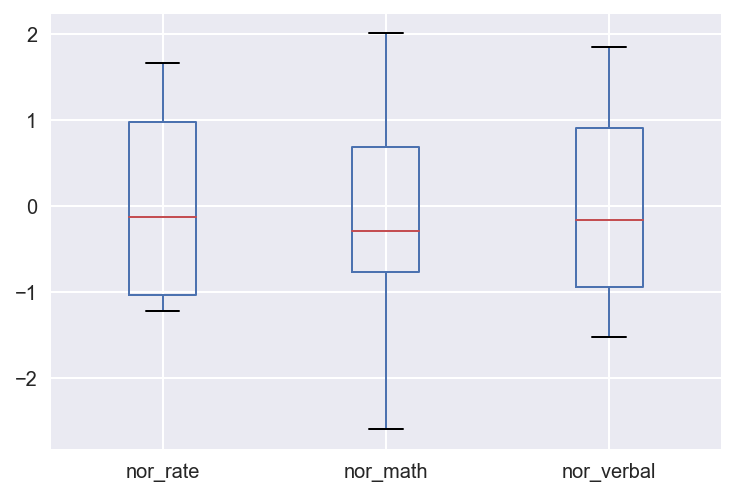

In [20]:
sat_scores[['nor_rate','nor_math','nor_verbal']].plot.box(stacked=True)

In [21]:
####plot the standardize math, rate and verbal

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have an average `Verbal` score greater than the average of `Verbal` scores across the entire dataset

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [22]:
verbal_mean

532.0192307692307

In [23]:
sat_scores[sat_scores['Verbal']>verbal_mean]['State']

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [24]:
sat_scores.loc(sat_scores['Verbal']>verbal_mean)

In [25]:
sat_scores.head()

,State,Rate,Verbal,Math,nor_rate,nor_math,nor_verbal
0,CT,82,509,510,1.658635,-0.602798,-0.699352
1,NJ,81,499,513,1.621650,-0.518687,-1.003164
2,MA,79,511,515,1.547680,-0.462613,-0.638589
3,NY,77,495,505,1.473710,-0.742984,-1.124689
4,NH,72,520,516,1.288785,-0.434575,-0.365159


In [26]:
sat_scores.loc[sat_scores['Verbal']>verbal_mean,'Verbal']

26    539
27    534
28    539
30    543
31    562
32    551
33    576
34    550
35    547
36    561
37    580
38    577
39    559
40    562
41    567
42    577
43    564
44    584
45    562
46    575
47    593
48    577
49    592
50    566
Name: Verbal, dtype: int64

In [27]:
len(sat_scores.loc[sat_scores.loc[:,'Verbal']>verbal_mean,'State'])

24

### 5.2 Find the list of states that have a median `Verbal` score greater than the median of `Verbal` scores across the entire dataset

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [28]:
verbal_median=np.median(sat_scores['Verbal'])

In [29]:
len(sat_scores.loc[sat_scores.loc[:,'Verbal']>verbal_median,'State'])

26

In [30]:
sat_scores.loc[sat_scores.loc[:,'Verbal']>verbal_median,'State']

19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [31]:
print(verbal_mean,verbal_median)

532.0192307692307 526.5


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [32]:
sat_scores['diff']=sat_scores['Verbal']-sat_scores['Math']

In [33]:
sat_scores.head()

,State,Rate,Verbal,Math,nor_rate,nor_math,nor_verbal,diff
0,CT,82,509,510,1.658635,-0.602798,-0.699352,-1
1,NJ,81,499,513,1.621650,-0.518687,-1.003164,-14
2,MA,79,511,515,1.547680,-0.462613,-0.638589,-4
3,NY,77,495,505,1.473710,-0.742984,-1.124689,-10
4,NH,72,520,516,1.288785,-0.434575,-0.365159,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [34]:
new_df = sat_scores.loc[sat_scores.loc[:,'diff']>0,:].sort_values(by='diff',ascending=False).head(10).copy()

In [35]:
new_df

,State,Rate,Verbal,Math,nor_rate,nor_math,nor_verbal,diff
27,OH,26,534,439,-0.412525,-2.593434,0.060178,95
29,WV,18,527,512,-0.708405,-0.546724,-0.152490,15
50,MS,4,566,551,-1.226195,0.546724,1.032376,15
45,AR,6,562,550,-1.152225,0.518687,0.910852,12
31,TN,13,562,553,-0.893330,0.602798,0.910852,9
9,VA,68,510,501,1.140845,-0.855132,-0.668971,9
32,NM,13,551,542,-0.893330,0.294390,0.576658,9
16,DC,56,482,474,0.697025,-1.612135,-1.519644,8
41,OK,8,567,561,-1.078255,0.827095,1.062758,6
8,ME,69,506,500,1.177830,-0.883169,-0.790495,6


In [36]:
new_df.head(3)

,State,Rate,Verbal,Math,nor_rate,nor_math,nor_verbal,diff
27,OH,26,534,439,-0.412525,-2.593434,0.060178,95
29,WV,18,527,512,-0.708405,-0.546724,-0.152490,15
50,MS,4,566,551,-1.226195,0.546724,1.032376,15


In [37]:
new_df_2 = sat_scores.loc[sat_scores.loc[:,'diff']<=0,:].sort_values(by='diff').head(10).copy()

In [38]:
new_df_2.head(3)

,State,Rate,Verbal,Math,nor_rate,nor_math,nor_verbal,diff
21,HI,52,485,515,0.549085,-0.462613,-1.428501,-30
23,CA,51,498,517,0.512100,-0.406538,-1.033545,-19
1,NJ,81,499,513,1.621650,-0.518687,-1.003164,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).


- Use seaborn's `.heatmap` method to add some color to the matrix
- Set `annot=True`


In [39]:
corr=sat_scores[['Rate','Verbal','Math']].corr()

In [40]:
corr

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


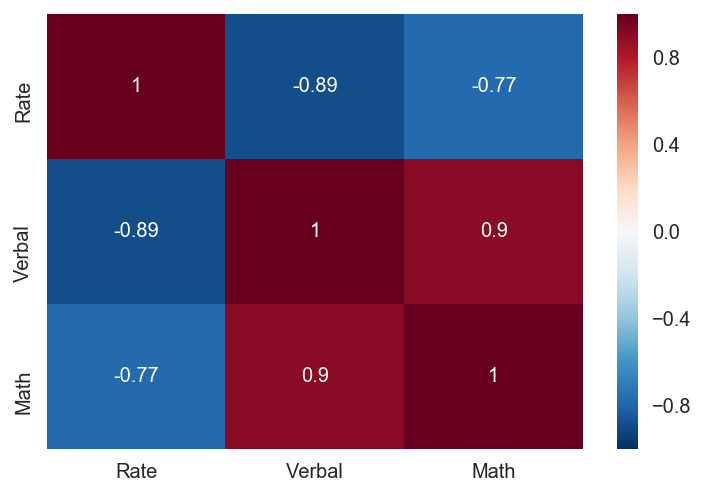

In [41]:
sns.heatmap(corr,annot=True)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [42]:
sat_scores.describe()

,Rate,Verbal,Math,nor_rate,nor_math,nor_verbal,diff
count,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,52.000000
mean,37.153846,532.019231,531.500000,3.202566e-17,-1.633309e-16,1.661064e-15,0.519231
std,27.301788,33.236225,36.014975,1.009756e+00,1.009756e+00,1.009756e+00,15.729939
min,4.000000,482.000000,439.000000,-1.226195e+00,-2.593434e+00,-1.519644e+00,-30.000000
25%,9.000000,501.000000,504.000000,-1.041270e+00,-7.710209e-01,-9.424014e-01,-6.000000
50%,33.500000,526.500000,521.000000,-1.351375e-01,-2.943898e-01,-1.676808e-01,0.000000
75%,63.500000,562.000000,555.750000,9.744122e-01,6.799003e-01,9.108517e-01,4.250000
max,82.000000,593.000000,603.000000,1.658635e+00,2.004654e+00,1.852669e+00,95.000000


num of rows
mean 
standard deviation 
min value
25 percentile
50 percentile
75 percentile
max value

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [43]:
math=sat_scores['Math']
rate=sat_scores['Rate']
verbal=sat_scores['Verbal']

In [44]:
cov=np.cov([rate,verbal,math])
print(cov)
print(corr)

[[  745.38763198  -804.35595777  -760.80392157]
 [ -804.35595777  1104.64668175  1077.14705882]
 [ -760.80392157  1077.14705882  1297.07843137]]
            Rate    Verbal      Math
Rate    1.000000 -0.886432 -0.773746
Verbal -0.886432  1.000000  0.899871
Math   -0.773746  0.899871  1.000000


In [45]:
# Covariance matrix shows how rate, verbal and math vary with respect to one another. 
# Correlation matrix tells you the strength of the relationship. 
# Covariance matrix and correlation matrix show the same results for the relationships between every two variables.
# Rate has a strong negative linear relationship with Varbal. 
# Rate has a strong negative linear relationship with Math.
# Math has a strong positive linear relationship with Verbal.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [46]:
eda=pd.read_csv('drug-use-by-age.csv',na_values='-')

In [47]:
eda.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

#missing values:
cocaine-frequency,
heroin-frequency,
inhalant-frequency,
oxycontin-frequency, 
meth-frequency

In [48]:
eda.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,17.000000,...,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,0.352941,...,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,0.333762,...,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,0.100000,...,0.400000,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,0.600000,...,1.400000,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [49]:
eda.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [50]:
corre=eda[['alcohol-use','marijuana-use',
           'cocaine-use','crack-use',
           'heroin-use','hallucinogen-use',
           'inhalant-use','pain-releiver-use',
           'oxycontin-use','tranquilizer-use',
           'stimulant-use','meth-use',
           'sedative-use'
          ]].corr()
corre

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
alcohol-use,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268
marijuana-use,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766
cocaine-use,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.906638,0.865626,0.920430,0.923954,0.889353,0.461914
crack-use,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.652764,0.603003,0.772651,0.618008,0.694324,0.438421
heroin-use,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.805868,0.775321,0.818583,0.808024,0.816620,0.333649
hallucinogen-use,0.463702,0.959353,0.855668,0.556222,0.683674,1.000000,0.173030,0.909333,0.916777,0.862900,0.940008,0.780071,0.518700
inhalant-use,-0.648248,0.127336,-0.214609,-0.543499,-0.215961,0.173030,1.000000,0.092045,0.110492,-0.103745,0.108381,-0.059903,0.110611
pain-releiver-use,0.617523,0.966226,0.906638,0.652764,0.805868,0.909333,0.092045,1.000000,0.976445,0.959283,0.961484,0.918051,0.636666
oxycontin-use,0.589219,0.971733,0.865626,0.603003,0.775321,0.916777,0.110492,0.976445,1.000000,0.955081,0.947492,0.895790,0.625929
tranquilizer-use,0.735785,0.935199,0.920430,0.772651,0.818583,0.862900,-0.103745,0.959283,0.955081,1.000000,0.909784,0.936270,0.674618


Strong Positive Relationships:
    alcohal-use with cocaine-use, 
                     crack-use, 
                     tranquilizer-use
    
    marijuana-use with cocaine-use, 
                       heroin-use, 
                       hallucinogen-use, 
                       pain-releiver-use, 
                       oxycontin-use, 
                       tranquilizer-use,
                       stimulant-use,
                       meth-use
   
    cocaine-use with crack-use,
                     heroin-use,
                     hallucinogen-use,
                     pain-releiver-use, 
                     oxycontin-use, 
                     tranquilizer-use,
                     stimulant-use,
                     meth-use
   
    ......

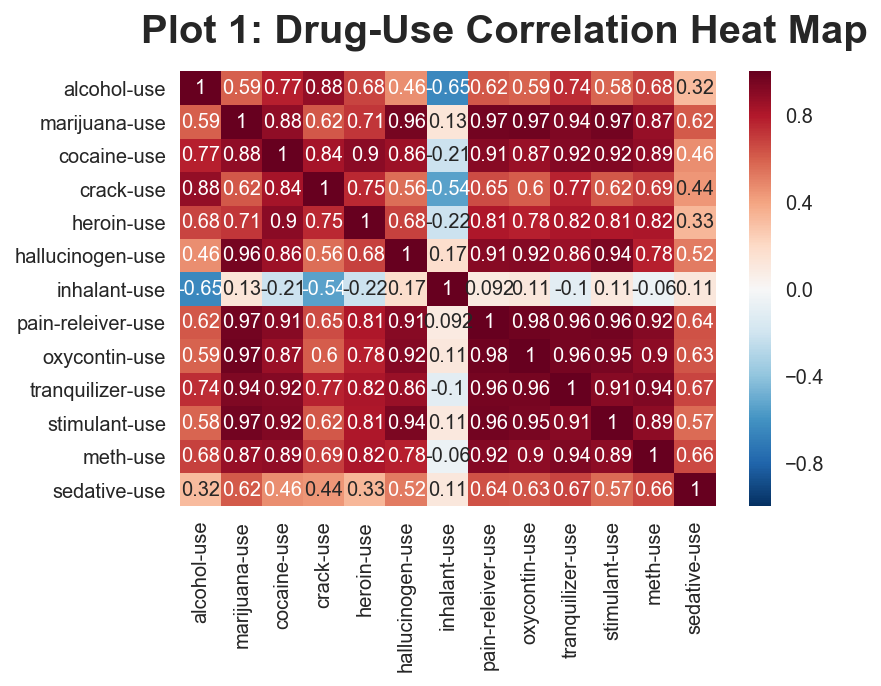

In [51]:
sns.heatmap(corre,annot=True)
sns.plt.suptitle("Plot 1: Drug-Use Correlation Heat Map",fontweight='bold',fontsize=20)

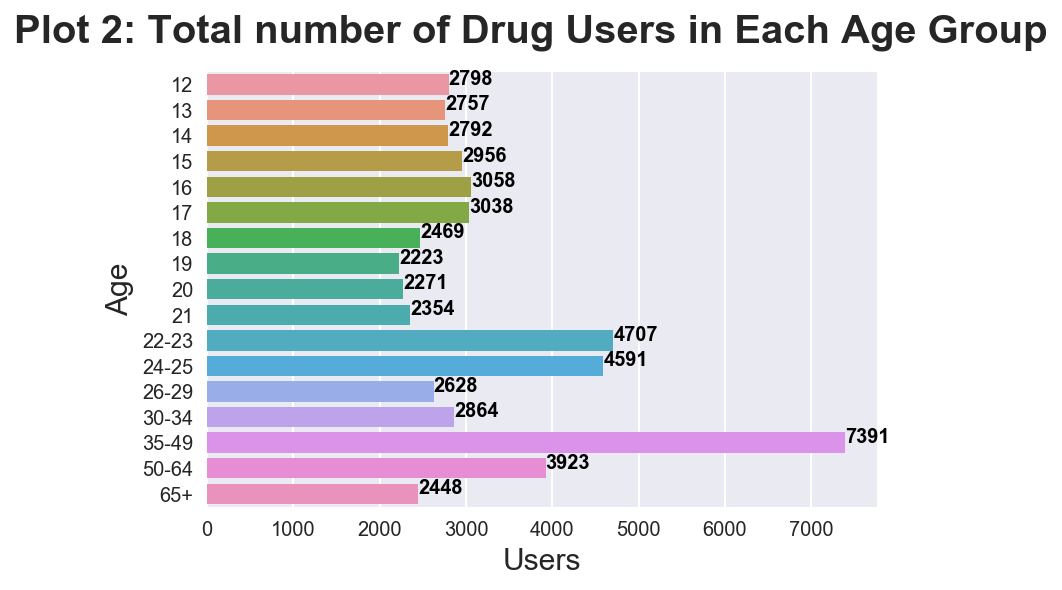

In [52]:
sns.barplot(x=eda['n'],y=eda['age'])
sns.plt.suptitle("Plot 2: Total number of Drug Users in Each Age Group",fontweight='bold',fontsize=20)
sns.plt.xlabel('Users',fontsize=15)
sns.plt.ylabel('Age',fontsize=15)
for i, v in enumerate(eda['n']):
    sns.plt.text(v, i, str(v), color='black', fontweight='bold')

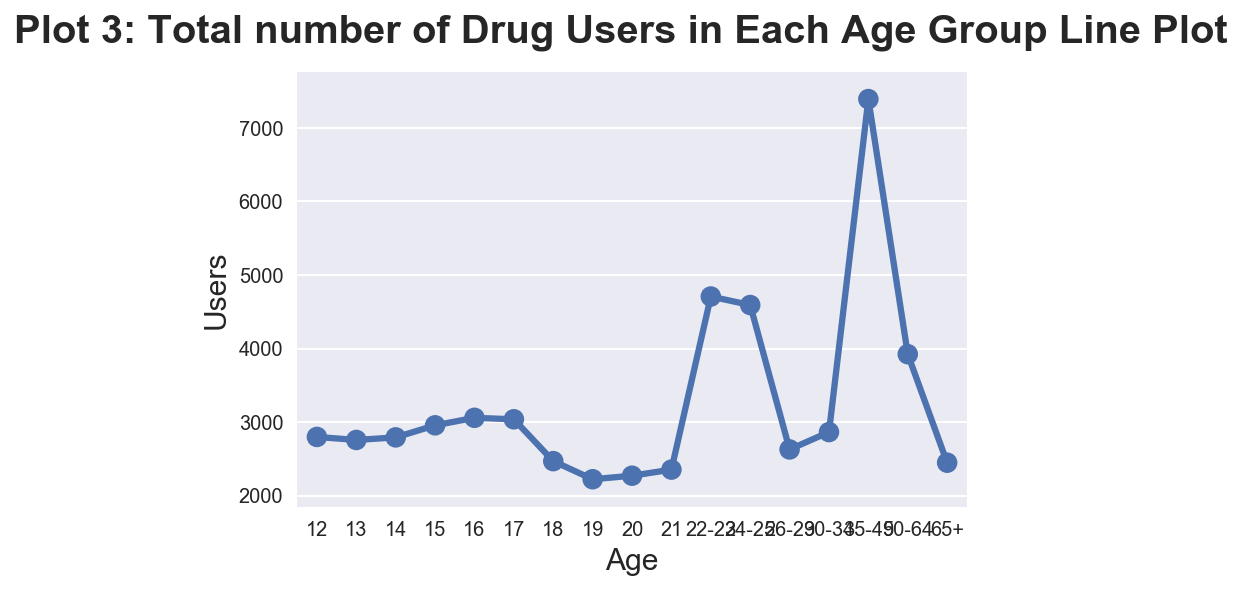

In [53]:
sns.pointplot(x=eda['age'],y=eda['n'])
sns.plt.suptitle("Plot 3: Total number of Drug Users in Each Age Group Line Plot",fontweight='bold',fontsize=20)
sns.plt.ylabel('Users',fontsize=15)
sns.plt.xlabel('Age',fontsize=15)



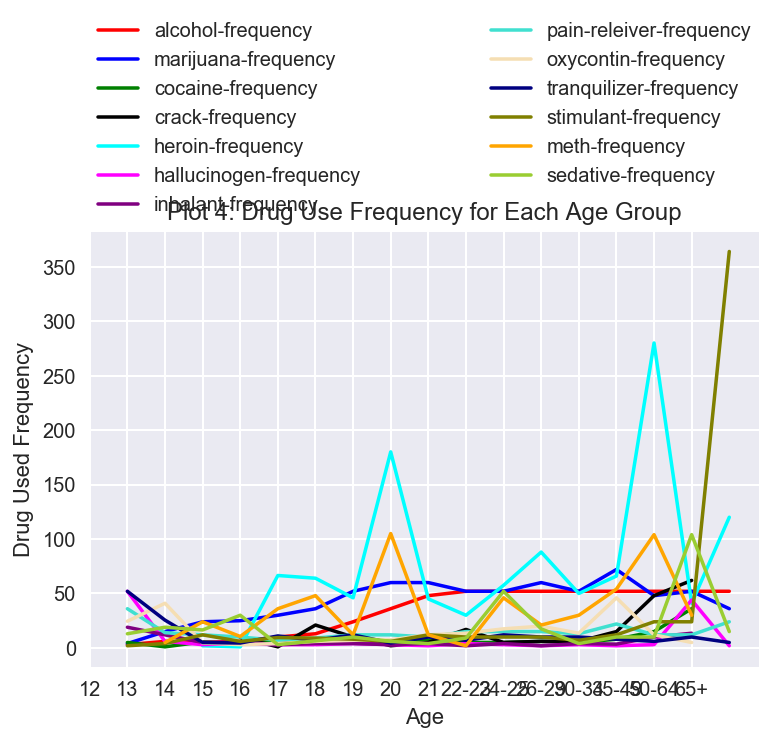

In [54]:
fig = plt.figure()
#figsize=(20,16), dpi=300
all_data = [np.random.normal(0, std, 100) for std in range(1, 7)]


# ## Line Chart

ax6 = plt.subplot(1, 1, 1)
ax6.set_title('Plot 4: Drug Use Frequency for Each Age Group')
ax6.set_ylabel('Drug Used Frequency')
ax6.set_xlabel('Age')

xs = [x for x in range(1, 18)]


first_line = ax6.plot(xs,eda['alcohol-frequency'], color='red')
second_line = ax6.plot(xs,eda['marijuana-frequency'], color='blue')
third_line = ax6.plot(xs,eda['cocaine-frequency'], color='green')
fourth_line = ax6.plot(xs,eda['crack-frequency'], color='black')
fivth_line = ax6.plot(xs,eda['heroin-frequency'], color='cyan')
sixth_line = ax6.plot(xs,eda['hallucinogen-frequency'], color='magenta')
senventh_line = ax6.plot(xs,eda['inhalant-frequency'], color='purple')
eighth_line = ax6.plot(xs,eda['pain-releiver-frequency'], color='turquoise')
ninth_line = ax6.plot(xs,eda['oxycontin-frequency'], color='wheat')
tenth_line = ax6.plot(xs,eda['tranquilizer-frequency'], color='navy')
eleventh_line = ax6.plot(xs,eda['stimulant-frequency'], color='olive')
twelveth_line = ax6.plot(xs,eda['meth-frequency'], color='orange')
thirdteen_line = ax6.plot(xs,eda['sedative-frequency'], color='yellowgreen')

#add legend
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

x=range(17)
plt.xticks(x,eda['age'])

plt.show()

In [55]:
eda.shape

(17, 28)

In [79]:
means=[]
for i in eda:
    if 'use' in i:
        col1=i+'-count'
        eda[col1] = eda['n']*eda[i]/100
        
        
#create 13 new columns of users number in each age group
#by n*use 

In [80]:
eda.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency', 'alcohol-use-count',
       'marijuana-use-count', 'cocaine-use-count', 'crack-use-count',
       'heroin-use-count', 'hallucinogen-use-count', 'inhalant-use-count',
       'pain-releiver-use-count', 'oxycontin-use-count',
       'tranquilizer-use-count', 'stimulant-use-count', 'meth-use-count',
       'sedative-use-count', 'alcohol-use-count-count',
       'marijuana-use-count-count', 'cocaine-use-count-count',
       'crac

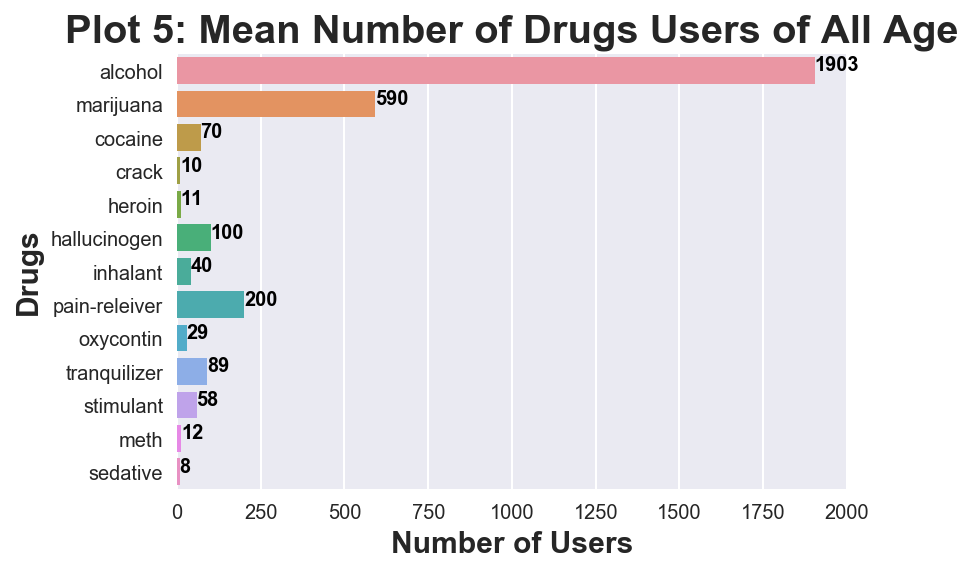

In [58]:
#get mean number of users
mean_users=[]
for i in eda.loc[:,'alcohol-use-count':'sedative-use-count'].mean():
    mean_users.append(int(i))
drug_names=['alcohol','marijuana','cocaine','crack',
                      'heroin','hallucinogen','inhalant','pain-releiver',
                      'oxycontin','tranquilizer','stimulant','meth','sedative']
sns.barplot(x=eda.loc[:,'alcohol-use-count':'sedative-use-count'].mean(),y=drug_names)
sns.plt.xlabel('Number of Users', fontweight='bold',fontsize=15)
sns.plt.ylabel('Drugs',fontweight='bold',fontsize=15)
sns.plt.title('Plot 5: Mean Number of Drugs Users of All Age',fontweight='bold',fontsize=20)
for i, v in enumerate(mean_users):
     sns.plt.text(v, i, str(v), color='black', fontweight='bold')

In [89]:
#get mean number of users
mean_frequncy=[]
for i in eda:
    if 'frequency' in i:
        mean_frequncy.append(int(eda[i].mean()))


In [90]:
mean_frequncy

[33, 42, 7, 15, 73, 8, 6, 14, 14, 11, 31, 35, 19]

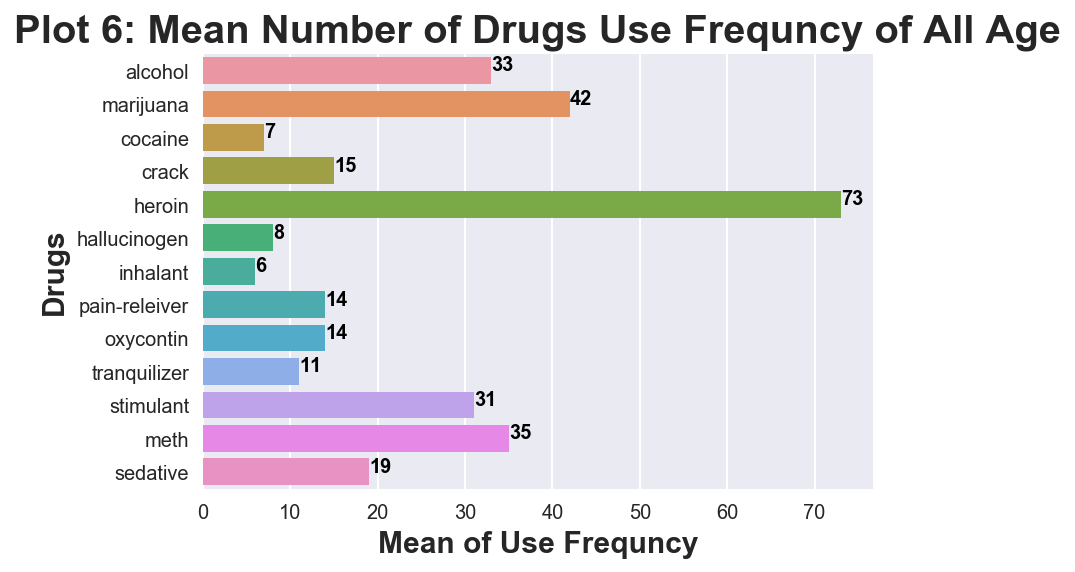

In [91]:
drug_names=['alcohol','marijuana','cocaine','crack',
                      'heroin','hallucinogen','inhalant','pain-releiver',
                      'oxycontin','tranquilizer','stimulant','meth','sedative']

sns.barplot(x=mean_frequncy, y=drug_names)
sns.plt.xlabel('Mean of Use Frequncy', fontweight='bold',fontsize=15)
sns.plt.ylabel('Drugs',fontweight='bold',fontsize=15)
sns.plt.title('Plot 6: Mean Number of Drugs Use Frequncy of All Age',fontweight='bold',fontsize=20)
for i, v in enumerate(mean_frequncy):
     sns.plt.text(v, i, str(v), color='black', fontweight='bold')

In [104]:
mean_druguse=[]
for i in eda:
    if ('use' in i) and ('count' not in i):
        mean_druguse.append((eda[i].mean()))


In [105]:
mean_druguse

[55.42941176470588,
 18.923529411764704,
 2.176470588235294,
 0.29411764705882354,
 0.3529411764705882,
 3.3941176470588235,
 1.388235294117647,
 6.270588235294118,
 0.9352941176470588,
 2.8058823529411767,
 1.917647058823529,
 0.38235294117647056,
 0.2823529411764706]

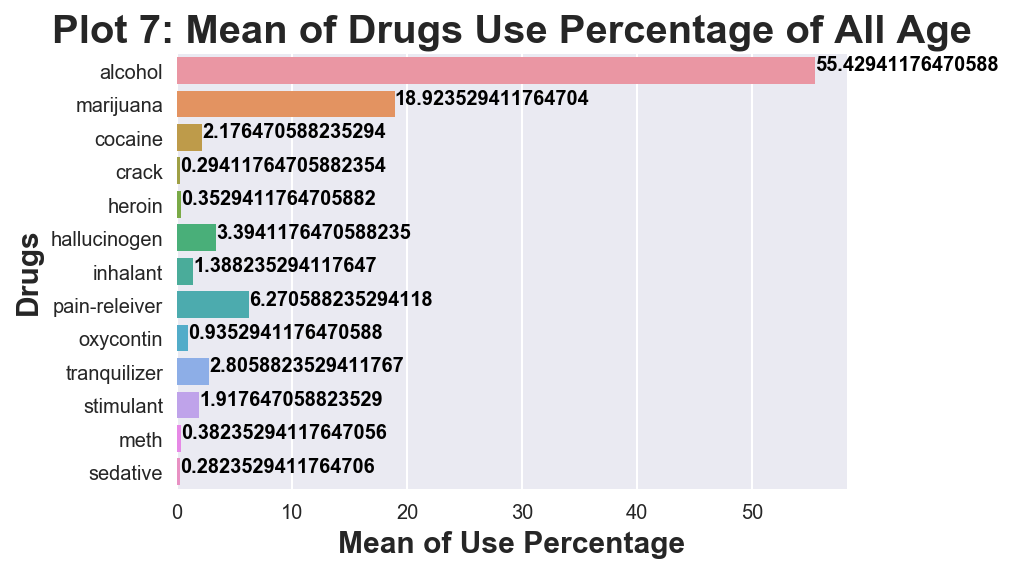

In [106]:
sns.barplot(x=mean_druguse, y=drug_names)
sns.plt.xlabel('Mean of Use Percentage', fontweight='bold',fontsize=15)
sns.plt.ylabel('Drugs',fontweight='bold',fontsize=15)
sns.plt.title('Plot 7: Mean of Drugs Use Percentage of All Age',fontweight='bold',fontsize=20)
for i, v in enumerate(mean_druguse):
     sns.plt.text(v, i, str(v), color='black', fontweight='bold')

In [96]:
eda.mean()

n                                 3251.058824
alcohol-use                         55.429412
alcohol-frequency                   33.352941
marijuana-use                       18.923529
marijuana-frequency                 42.941176
cocaine-use                          2.176471
cocaine-frequency                    7.875000
crack-use                            0.294118
crack-frequency                     15.035714
heroin-use                           0.352941
heroin-frequency                    73.281250
hallucinogen-use                     3.394118
hallucinogen-frequency               8.411765
inhalant-use                         1.388235
inhalant-frequency                   6.156250
pain-releiver-use                    6.270588
pain-releiver-frequency             14.705882
oxycontin-use                        0.935294
oxycontin-frequency                 14.812500
tranquilizer-use                     2.805882
tranquilizer-frequency              11.735294
stimulant-use                     

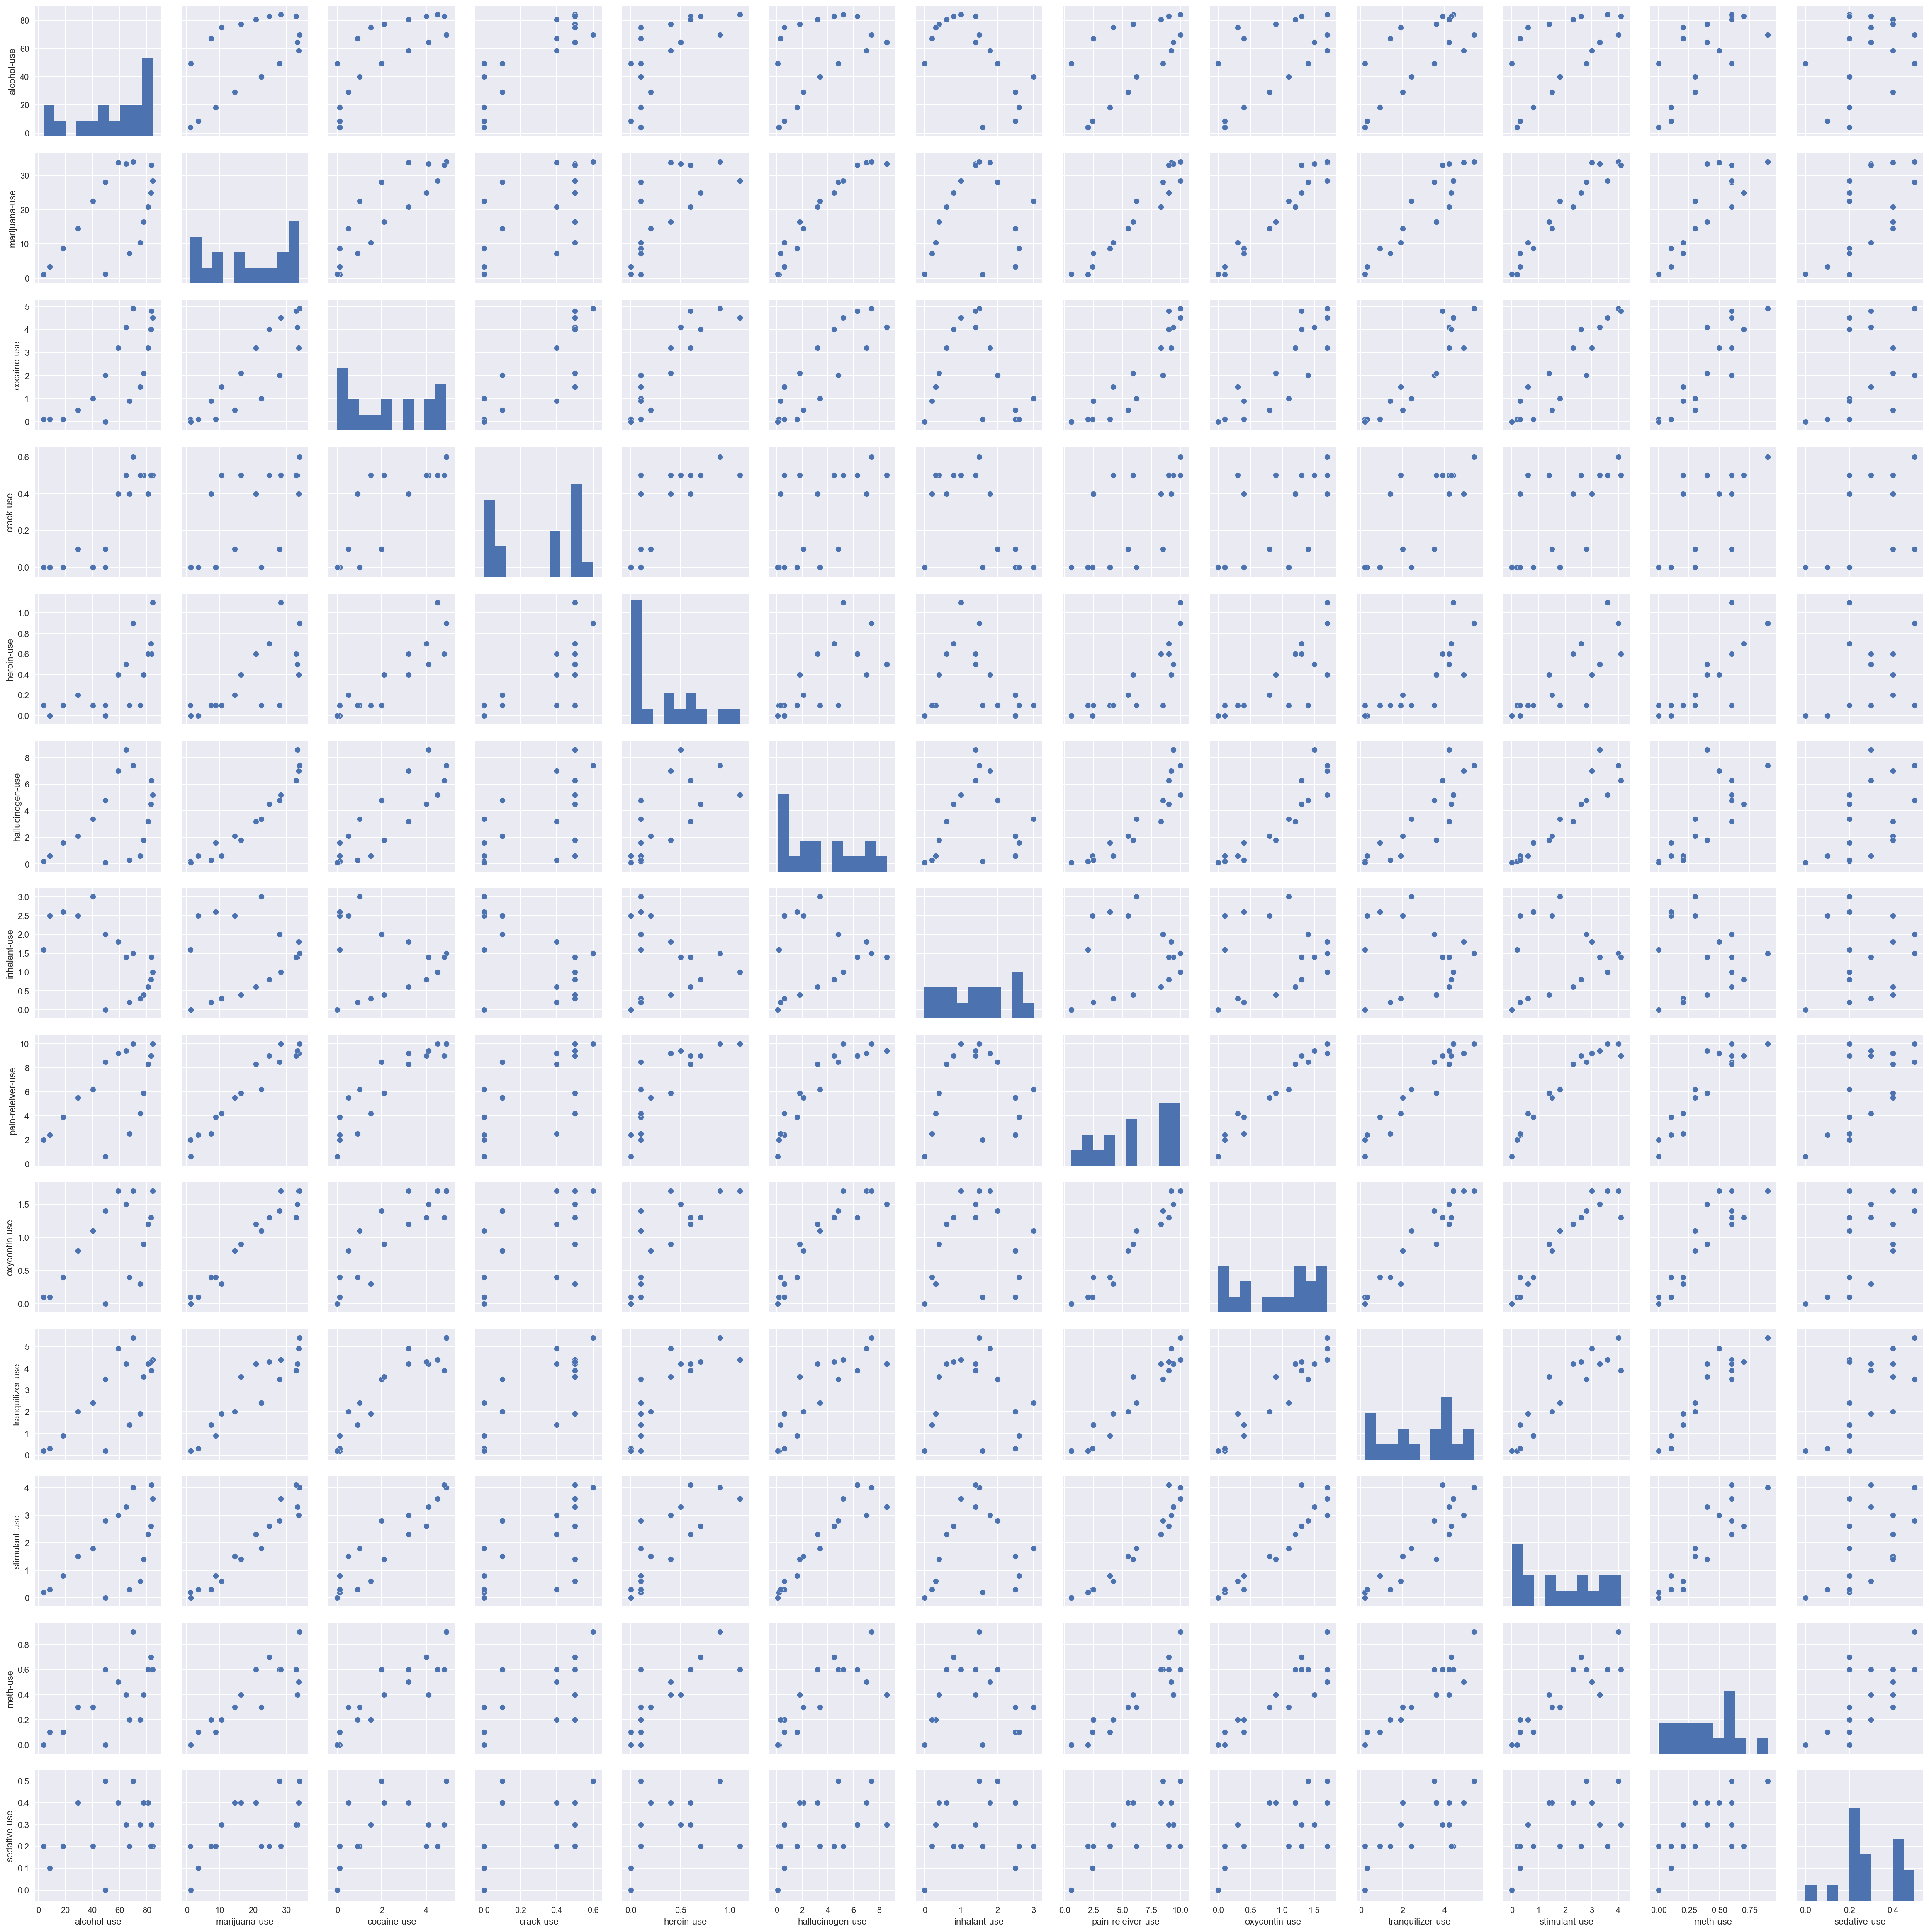

In [59]:
sns.pairplot(eda,vars=['alcohol-use','marijuana-use',
           'cocaine-use','crack-use',
           'heroin-use','hallucinogen-use',
           'inhalant-use','pain-releiver-use',
           'oxycontin-use','tranquilizer-use',
           'stimulant-use','meth-use',
           'sedative-use'
          ])

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

Testing the mean of alcohol-frequency is equal to the mean of marijuana-frequency at 0.05 significance level.

H0: x_alcohol-frequency = x_marijuana-frequency (means are equal)
H1: x_alcohol-frequency is not equal to x_marijuana-frequency

In [60]:
# Code

#alcohol
mean_alcohol=np.mean(eda['alcohol-frequency'])
std_alcohol = np.std(eda['alcohol-frequency'],ddof=1)
se_alcohol = std_alcohol / np.sqrt(len(eda['alcohol-frequency']))
n_alcohol = len(eda['alcohol-frequency'])
print(mean_alcohol,std_alcohol,se_alcohol, n_alcohol)

#marijuana

mean_marijuana=np.mean(eda['marijuana-frequency'])
std_marijuana = np.std(eda['marijuana-frequency'],ddof=1)
se_marijuana = std_marijuana / np.sqrt(len(eda['marijuana-frequency']))
n_marijuana = len(eda['marijuana-frequency'])
print(mean_marijuana,std_marijuana,se_marijuana, n_marijuana)

33.35294117647059 21.318833154251752 5.17057652411 17
42.94117647058823 18.362565820968808 4.45357637866 17


In [61]:
t_stat, p_value  = stats.ttest_ind_from_stats(mean_alcohol, std_alcohol,n_alcohol, 
                                                    mean_marijuana, std_marijuana, n_marijuana)
print (t_stat, p_value )

-1.40504189798 0.169642784062


**Report**



...

p-value = 0.157 > 0.05, Reject the null hypothesis, Conclude that the mean of alcohol-frequency is not equal to the mean of marijuana-frequency.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the SAT dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [62]:
rate_mean-rate_std

10.115849659322564

In [63]:
sat_scores['nor_rate'].describe()

count    5.200000e+01
mean     3.202566e-17
std      1.009756e+00
min     -1.226195e+00
25%     -1.041270e+00
50%     -1.351375e-01
75%      9.744122e-01
max      1.658635e+00
Name: nor_rate, dtype: float64

In [64]:
sat_scores[sat_scores['nor_rate']>1.645]

,State,Rate,Verbal,Math,nor_rate,nor_math,nor_verbal,diff
0,CT,82,509,510,1.658635,-0.602798,-0.699352,-1


In [65]:
##Using 90%CI, CT with Rate of 82 is an outlier.

In [66]:
##95%CI:(-16.357,90.664)

{'boxes': [<matplotlib.lines.Line2D at 0x12eff4f60>],
 'caps': [<matplotlib.lines.Line2D at 0x12e6e30b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x12f0126a0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12e7995f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12e61a0b8>,
  <matplotlib.lines.Line2D at 0x12e68d4e0>]}

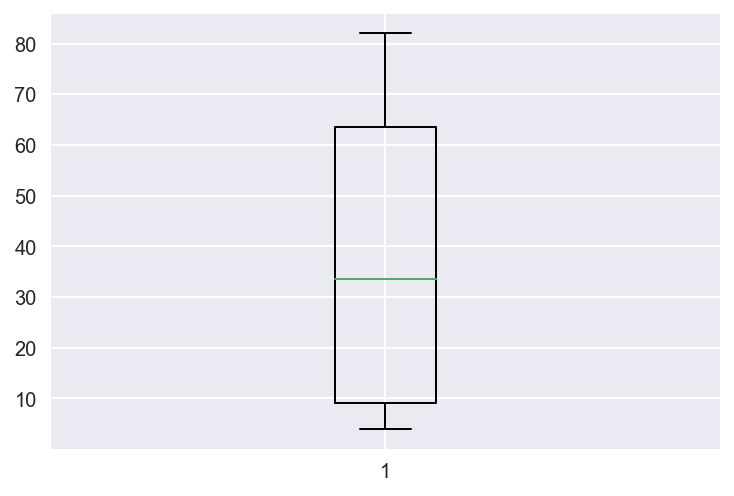

In [67]:
plt.boxplot(sat_scores['Rate'])

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [68]:
stats.spearmanr(sat_scores['Verbal'],sat_scores['Math'])

SpearmanrResult(correlation=0.90520488479402839, pvalue=3.2352319597775181e-20)

In [69]:
stats.pearsonr(sat_scores['Verbal'],sat_scores['Math'])

(0.899870852544429, 1.1920026733067679e-19)

spearman corr is slightly higher than pearson corr. 

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [70]:
percentile_rate=[]
for i in sat_scores['Rate']:
    percentile_rate.append(stats.percentileofscore(sat_scores['Rate'],i))

In [71]:
sat_scores['percentile_rate']=percentile_rate

In [72]:
sat_scores.head(10)

,State,Rate,Verbal,Math,nor_rate,nor_math,nor_verbal,diff,percentile_rate
0,CT,82,509,510,1.658635,-0.602798,-0.699352,-1,100.000000
1,NJ,81,499,513,1.621650,-0.518687,-1.003164,-14,98.076923
2,MA,79,511,515,1.547680,-0.462613,-0.638589,-4,96.153846
3,NY,77,495,505,1.473710,-0.742984,-1.124689,-10,94.230769
4,NH,72,520,516,1.288785,-0.434575,-0.365159,4,92.307692
5,RI,71,501,499,1.251800,-0.911207,-0.942401,2,89.423077
6,PA,71,500,499,1.251800,-0.911207,-0.972783,1,89.423077
7,VT,69,511,506,1.177830,-0.714947,-0.638589,5,85.576923
8,ME,69,506,500,1.177830,-0.883169,-0.790495,6,85.576923
9,VA,68,510,501,1.140845,-0.855132,-0.668971,9,82.692308


In [73]:
ca=sat_scores[sat_scores['State']=='CA']
ca

,State,Rate,Verbal,Math,nor_rate,nor_math,nor_verbal,diff,percentile_rate
23,CA,51,498,517,0.5121,-0.406538,-1.033545,-19,56.730769


In [74]:
stats.percentileofscore(sat_scores['Rate'],51)

56.730769230769226

In [75]:
##California is at 56.73 percentile

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

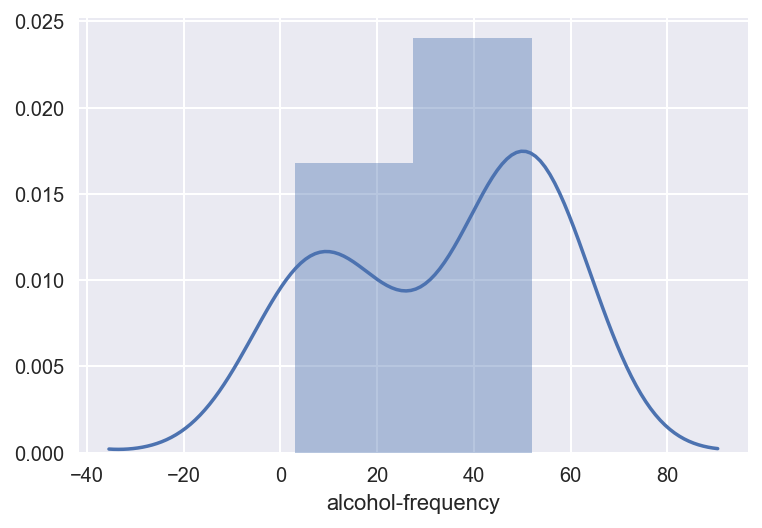

In [76]:
sns.distplot(eda['alcohol-frequency'])

In [77]:
alcohol_percentile_rate=[]
for i in eda['alcohol-frequency']:
    alcohol_percentile_rate.append(stats.percentileofscore(eda['alcohol-frequency'],i))

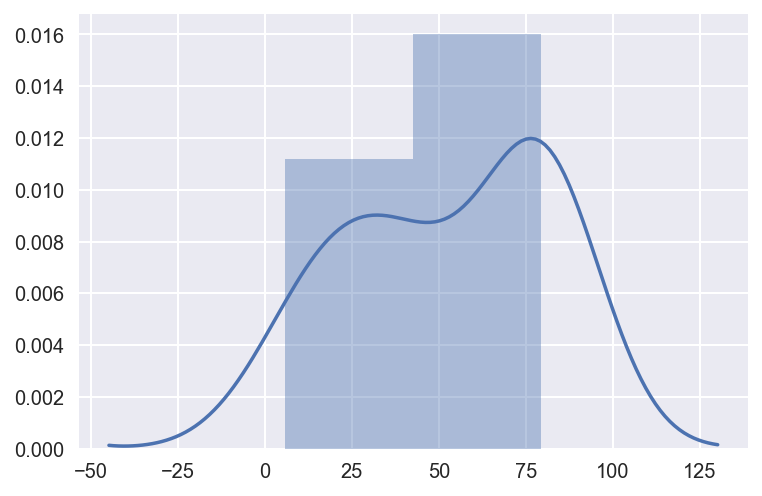

In [78]:
sns.distplot(alcohol_percentile_rate)

Same shape but less skew